In [1]:
from math import pi, cos, sin, sqrt
import sys
sys.path.append('/root/alok/repos/cv_research/alok')

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from obb import OBB
from biomass_utils.points_of_interest import get_data, get_depth_cutoff, get_points_of_interest, distance_between_points

In [2]:
np.median(np.array([1, 2, 3]))

2.0

In [3]:
data_dir_base = '/root/data/blender_v3'
idx = 8

data = get_data(data_dir_base, idx)
point_cloud, mask, annotation, image = data['point_cloud'], data['mask'], data['annotation_data'], data['image']

# clean mask
i_values, j_values = np.where(mask > 0)
j_min, j_max = np.min(j_values), np.max(j_values)
for j in xrange(j_min, j_max+1):
    i_values = np.where(mask[:, j] > 0)[0]
    i_min, i_max = np.min(i_values), np.max(i_values)
    i_min_depth_value_mean = point_cloud[:,:,1][i_min-5:i_min+5, j].mean()
    i_max_depth_value_mean = point_cloud[:,:,1][i_max-5:i_max+5, j].mean()
    cutoff_depth_value = min(i_min_depth_value_mean, i_max_depth_value_mean)
    mask[:, j] = mask[:, j] * (point_cloud[:,:,1][:, j] < cutoff_depth_value)

fish_point_cloud = point_cloud[mask > 0]
depth_histogram = np.histogram(fish_point_cloud[:,1])
obb, eigen_vectors = OBB.build_from_points([(p[0], p[1], p[2]) for p in fish_point_cloud])
obb_points = np.array(obb.points)

In [21]:
[(p[0], p[1], p[2]) for p in fish_point_cloud]

[(-14.97556691493327, 101.52926721988658, 8.804491141724538),
 (-14.682692188346762, 101.2599461265294, 8.781135953159971),
 (-14.391207920762177, 100.99093277727843, 8.757807451779614),
 (-15.269919740684477, 101.79946493789652, 8.589329854135018),
 (-14.972148727156817, 101.50609306546995, 8.564576602399027),
 (-14.678410420725863, 101.23041669466113, 8.541316408612031),
 (-14.38677347086934, 100.95981383066203, 8.518484291962109),
 (-14.0964013431692, 100.68858102263714, 8.495599023785008),
 (-13.809490953291316, 100.43266147848229, 8.474005812246942),
 (-15.26934673841202, 101.7956449227468, 8.350423997569074),
 (-14.9718802734041, 101.5042730400278, 8.32652239781478),
 (-14.675433599307526, 101.20988689177605, 8.302373534091004),
 (-14.382012831558134, 100.92640583549567, 8.279119228693004),
 (-14.09201417088628, 100.65724407775913, 8.257039553253678),
 (-13.803097989556512, 100.38616719677462, 8.234802777860418),
 (-13.51564902500032, 100.11591870370607, 8.212633956163389),
 (-15

In [4]:
length = np.linalg.norm(obb_points[0] - obb_points[1])
width = np.linalg.norm(obb_points[0] - obb_points[3])
height = np.linalg.norm(obb_points[0] - obb_points[5])
print(length, width, height)
print(annotation['length'])
print(annotation['width'])
print(annotation['height'])

(115.9831628267676, 12.820196947554653, 22.30947164189282)
116.108112098
19.3513520163
23.2216224195


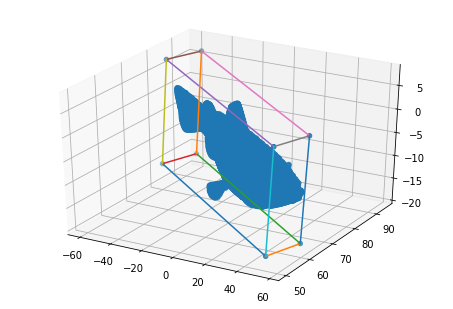

In [5]:
fig = plt.figure()
ax = Axes3D(fig)

# get x, y, and z lists
x_values = list(fish_point_cloud[:,0]) + list(obb_points[:,0])
y_values = list(fish_point_cloud[:,1]) + list(obb_points[:,1])
z_values = list(fish_point_cloud[:,2]) + list(obb_points[:,2])

ax.scatter(x_values, y_values, z_values)
# ax.view_init(30, 40)
for point_pair in [(0, 1), (1, 2), (2, 3), (3, 0), \
                   (4, 5), (5, 6), (6, 7), (7, 4), \
                   (0, 5), (1, 4), (2, 7), (3, 6)]:
    i, j = point_pair
    edge_x_values = [obb_points[i][0], obb_points[j][0]]
    edge_y_values = [obb_points[i][1], obb_points[j][1]]
    edge_z_values = [obb_points[i][2], obb_points[j][2]]
    ax.plot(edge_x_values, edge_y_values, edge_z_values)
# ax.plot([0, 30*eigen_vectors[0][0]], [0, 30*eigen_vectors[0][1]], [0, 30*eigen_vectors[0][2]])
# ax.plot([0, 30*eigen_vectors[1][0]], [0, 30*eigen_vectors[1][1]], [0, 30*eigen_vectors[1][2]])
# ax.plot([0, 30*eigen_vectors[2][0]], [0, 30*eigen_vectors[2][1]], [0, 30*eigen_vectors[2][2]])
plt.show()

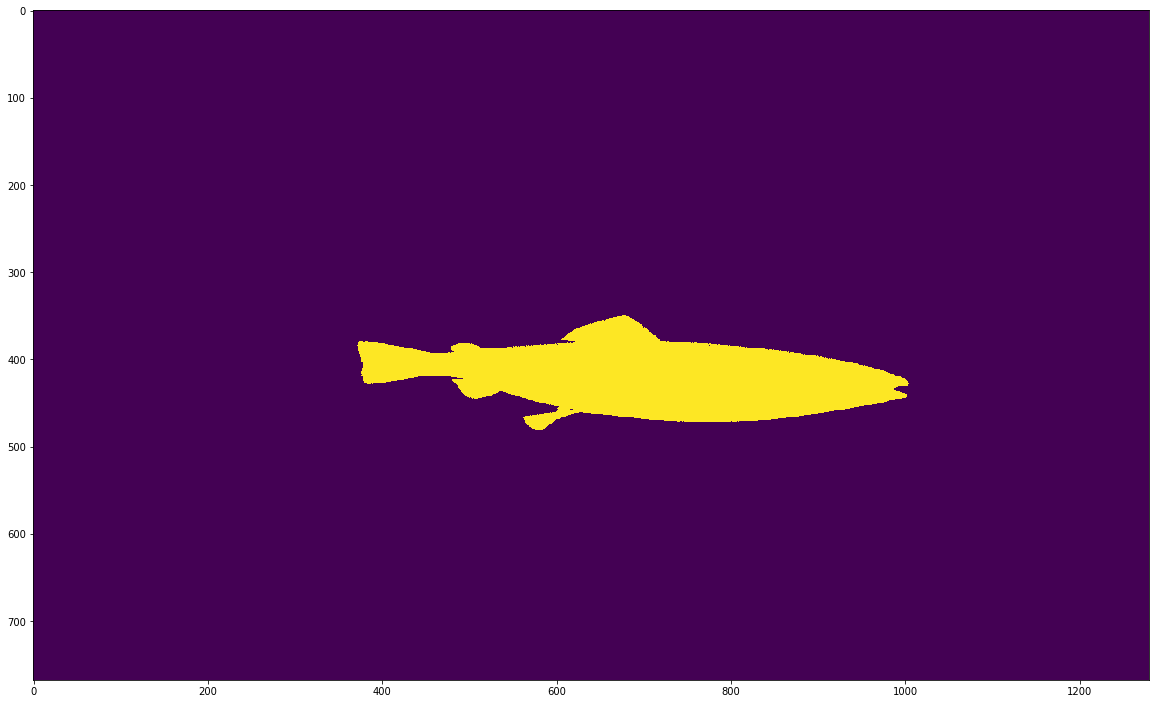

In [6]:
plt.figure(figsize=(20, 20))
plt.imshow(data['mask'])

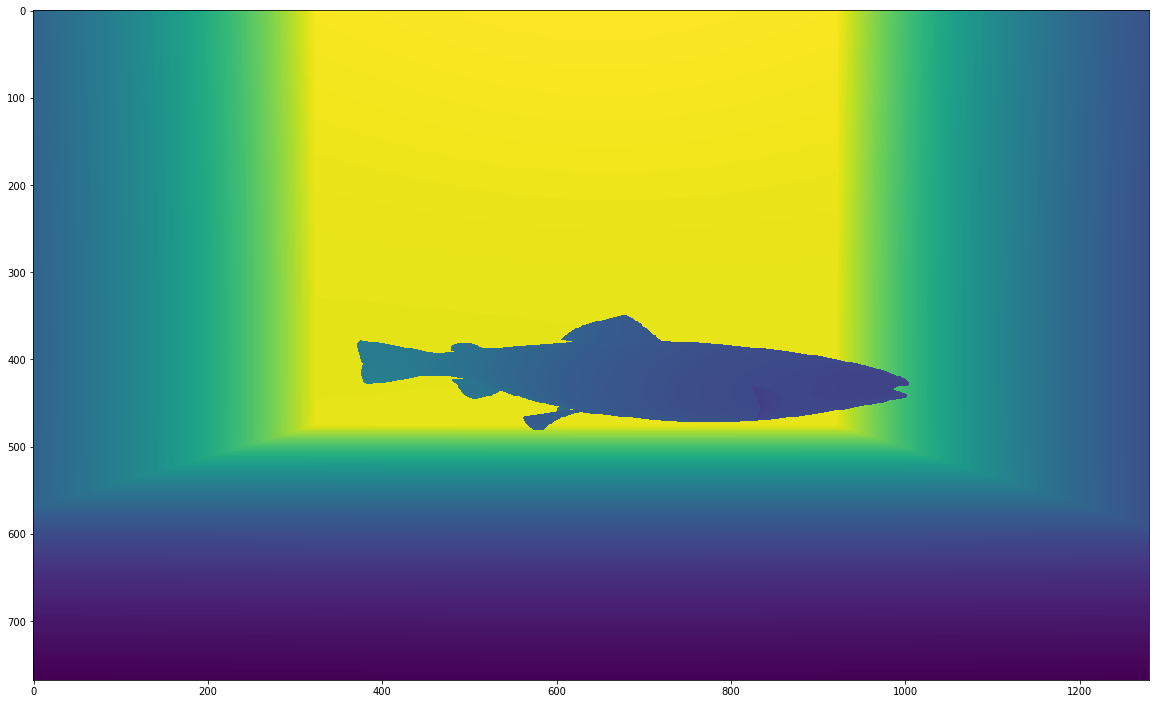

In [7]:
plt.figure(figsize=(20, 20))
plt.imshow(point_cloud[:,:,1])

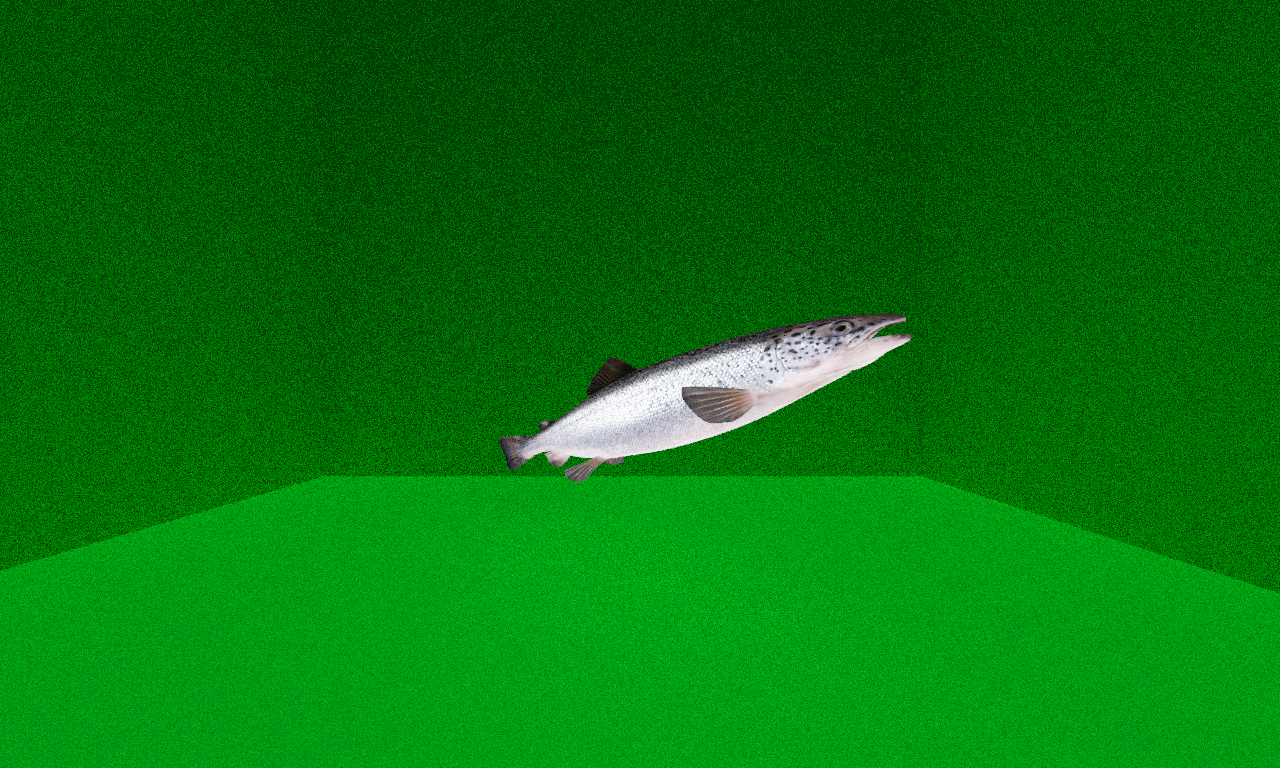

In [8]:
Image.open('{}/stereo_images/left_0.png'.format(data_dir_base))

In [9]:
data_dir_base = '/root/data/blender_v3'
idx_max = 5000

analysis_df = pd.DataFrame()
for idx in range(idx_max):
    if idx == 1454:
        continue
    
    if idx % 100 == 0:
        print(idx)
    
    data = get_data(data_dir_base, idx)
    point_cloud, mask, annotation, image = data['point_cloud'], data['mask'], data['annotation_data'], data['image']

    # clean mask
    i_values, j_values = np.where(mask > 0)
    j_min, j_max = np.min(j_values), np.max(j_values)
    for j in xrange(j_min, j_max+1):
        i_values = np.where(mask[:, j] > 0)[0]
        i_min, i_max = np.min(i_values), np.max(i_values)
        i_min_depth_value_mean = point_cloud[:,:,1][i_min-5:i_min+5, j].mean()
        i_max_depth_value_mean = point_cloud[:,:,1][i_max-5:i_max+5, j].mean()
        cutoff_depth_value = min(i_min_depth_value_mean, i_max_depth_value_mean)
        mask[:, j] = mask[:, j] * (point_cloud[:,:,1][:, j] < cutoff_depth_value)

    # get obb
    fish_point_cloud = point_cloud[mask > 0]
    depth_histogram = np.histogram(fish_point_cloud[:,1])
    obb, eigen_vectors = OBB.build_from_points([(p[0], p[1], p[2]) for p in fish_point_cloud])
    obb_points = np.array(obb.points)
    
    # get dimensions    
    length = np.linalg.norm(obb_points[0] - obb_points[1])
    width = np.linalg.norm(obb_points[0] - obb_points[3])
    height = np.linalg.norm(obb_points[0] - obb_points[5])
    obb_volume = length * width * height
    
    row_to_append = {
        'ground_truth_length': annotation['length'],
        'ground_truth_width': annotation['width'],
        'ground_truth_height': annotation['height'],
        'ground_truth_volume': annotation['volume'],
        'predicted_length': max(length, width, height),
        'obb_volume': length * width * height
    }
    analysis_df = analysis_df.append(row_to_append, ignore_index=True)
    
    
    
    

0
100


KeyboardInterrupt: 

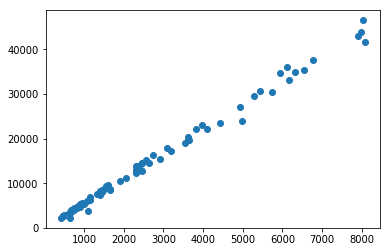

In [10]:
mask = analysis_df.obb_volume / analysis_df.ground_truth_volume < 6
plt.scatter(analysis_df[mask].ground_truth_volume, analysis_df[mask].obb_volume)
plt.show()

In [11]:
features = ['obb_volume']
target = 'ground_truth_volume'
TRAIN_SIZE = 2500

mask = (analysis_df.obb_volume / analysis_df.ground_truth_volume < 6) & (analysis_df.index < TRAIN_SIZE)
y = analysis_df.ix[mask, target]
X = analysis_df.ix[mask, features]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

A = np.vstack([analysis_df.ix[mask, features].values.T, np.ones(analysis_df[mask].shape[0])]).T
res = np.linalg.lstsq(A, analysis_df.ix[mask, target].values)
b, a = res[0]

                             OLS Regression Results                            
Dep. Variable:     ground_truth_volume   R-squared:                       0.994
Model:                             OLS   Adj. R-squared:                  0.994
Method:                  Least Squares   F-statistic:                 1.186e+04
Date:                 Wed, 25 Jul 2018   Prob (F-statistic):           1.51e-82
Time:                         23:39:21   Log-Likelihood:                -490.70
No. Observations:                   75   AIC:                             985.4
Df Residuals:                       73   BIC:                             990.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1189     31.823     -0.16

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


In [12]:
analysis_df['predicted_volume'] = model.params.const + model.params.obb_volume * analysis_df.obb_volume

In [13]:
test_mask = (analysis_df.obb_volume / analysis_df.ground_truth_volume < 6) & (analysis_df.index >= TRAIN_SIZE)
(analysis_df.ix[test_mask, 'predicted_volume'].mean() - analysis_df.ix[test_mask, 'ground_truth_volume'].mean())/(analysis_df.ix[test_mask, 'ground_truth_volume'].mean())

nan